**a) Given the dataset (q1-mys-auto.csv),**<br>

**i. What statistical analyses can be found in this dataset? (Please provide in-line comments/explanations in your code)** <br>

**ii.	Develop models to predict the “CAR_SALE_PRICE”. Provide explanation on model choice and variables used in your model. Please include any data plots and additional findings.**

In [196]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

In [197]:
data = pd.read_csv("data-assessment-ML/q1a-mys-auto.csv")

In [198]:
# Check how the data looks like
data.head()

,CAR_BRAND,CAR_LENGTH,CAR_WIDTH,CAR_HEIGHT,CAR_DOOR_NUM,CAR_BODY_STYLE,CAR_DRIVE_WHEELS,CAR_ENGINE_LOC,CAR_ENGINE_SIZE,CAR_ENGINE_BORE,CAR_ENGINE_STROKE,CAR_ENGINE_POWER,CAR_WHEEL_BASE,CAR_CURB_WEIGHT,CAR_PEAK_RPM,CAR_SALE_PRICE,CAR_CITY_KPL,CAR_HIGHWAY_KPL,CAR_FUEL_TYPE,CAR_FUEL_SYSTEM,CAR_COMPRESSION_RATIO
0,ISUZU,4335.78,1569.72,1358.90,4,SEDAN,RWD,FRONT,122,3.3,3.2,81.0,2395.22,1060,4900.0,8345.55,10.32,12.47,GAS,2BBL,9
1,TOYOTA,4224.02,1635.76,1341.12,4,HATCHBACK,FWD,FRONT,109,3.2,3.0,73.0,2430.78,963,4900.0,10280.34,12.04,14.62,GAS,2BBL,9
2,HONDA,4455.16,1656.08,1374.14,4,SEDAN,FWD,FRONT,121,3.2,3.6,104.0,2451.10,1118,5900.0,15922.35,10.32,12.04,GAS,MPFI,9
3,HONDA,4455.16,1587.50,1374.14,4,SEDAN,FWD,FRONT,121,3.2,3.6,89.0,2451.10,1076,5900.0,12662.85,11.61,14.19,GAS,1BBL,9
4,VOLKSWAGEN,4361.18,1663.70,1414.78,4,SEDAN,FWD,FRONT,108,3.0,3.4,71.0,2471.42,1052,4600.0,11678.85,15.91,18.06,DIESEL,IDI,23


In [199]:
# Check the columns
data.columns
# As for this dataset, we have 21 columns as below:

Index(['CAR_BRAND', 'CAR_LENGTH', 'CAR_WIDTH', 'CAR_HEIGHT', 'CAR_DOOR_NUM',
       'CAR_BODY_STYLE', 'CAR_DRIVE_WHEELS', 'CAR_ENGINE_LOC',
       'CAR_ENGINE_SIZE', 'CAR_ENGINE_BORE', 'CAR_ENGINE_STROKE',
       'CAR_ENGINE_POWER', 'CAR_WHEEL_BASE', 'CAR_CURB_WEIGHT', 'CAR_PEAK_RPM',
       'CAR_SALE_PRICE', 'CAR_CITY_KPL', 'CAR_HIGHWAY_KPL', 'CAR_FUEL_TYPE',
       'CAR_FUEL_SYSTEM', 'CAR_COMPRESSION_RATIO'],
      dtype='object')

In [200]:
# Total observation 
data.shape[0]

46460

In [201]:
# Select numeric columns
quantitative  = [f for f in data.columns if data.dtypes[f] != 'object']
quantitative
# As for this dataset, we have 15 columns as below:

['CAR_LENGTH',
 'CAR_WIDTH',
 'CAR_HEIGHT',
 'CAR_DOOR_NUM',
 'CAR_ENGINE_SIZE',
 'CAR_ENGINE_BORE',
 'CAR_ENGINE_STROKE',
 'CAR_ENGINE_POWER',
 'CAR_WHEEL_BASE',
 'CAR_CURB_WEIGHT',
 'CAR_PEAK_RPM',
 'CAR_SALE_PRICE',
 'CAR_CITY_KPL',
 'CAR_HIGHWAY_KPL',
 'CAR_COMPRESSION_RATIO']

In [202]:
# describe numeric columns 
data.describe()

,CAR_LENGTH,CAR_WIDTH,CAR_HEIGHT,CAR_DOOR_NUM,CAR_ENGINE_SIZE,CAR_ENGINE_BORE,CAR_ENGINE_STROKE,CAR_ENGINE_POWER,CAR_WHEEL_BASE,CAR_CURB_WEIGHT,CAR_PEAK_RPM,CAR_SALE_PRICE,CAR_CITY_KPL,CAR_HIGHWAY_KPL,CAR_COMPRESSION_RATIO
count,46460.000000,46460.000000,46460.000000,46460.000000,46460.000000,45080.000000,45080.000000,46000.000000,46460.000000,46460.000000,46000.000000,45540.000000,46460.000000,46460.000000,46460.000000
mean,4424.403366,1674.551584,1366.834356,3.128713,137.752475,3.335714,3.264796,106.940000,2512.261188,1159.346535,5227.250000,16202.069394,10.875594,13.236337,10.212871
std,315.853676,54.556030,60.997819,0.991693,41.810110,0.266595,0.320614,39.750607,151.165038,237.223966,481.482063,9815.681368,2.814817,2.970300,4.035681
min,3583.940000,1531.620000,1214.120000,2.000000,72.000000,2.500000,2.100000,51.000000,2199.640000,675.000000,4250.000000,6295.140000,5.590000,6.880000,7.000000
25%,4224.020000,1625.600000,1320.800000,2.000000,108.000000,3.200000,3.100000,73.000000,2400.300000,973.000000,4900.000000,9563.250000,8.170000,10.750000,9.000000
50%,4399.280000,1663.700000,1374.140000,4.000000,126.000000,3.300000,3.300000,98.000000,2466.340000,1094.000000,5300.000000,12572.445000,10.535000,12.900000,9.000000
75%,4688.840000,1699.260000,1414.780000,4.000000,152.000000,3.600000,3.400000,119.000000,2600.960000,1339.000000,5600.000000,20298.690000,12.900000,15.480000,9.000000
max,5285.740000,1836.420000,1518.920000,4.000000,337.000000,3.900000,4.200000,291.000000,3070.860000,1844.000000,6700.000000,55842.000000,21.070000,23.220000,23.000000


In [203]:
# Analysing the target CAR_SALE_PRICE
data['CAR_SALE_PRICE'].describe()

count    45540.000000
mean     16202.069394
std       9815.681368
min       6295.140000
25%       9563.250000
50%      12572.445000
75%      20298.690000
max      55842.000000
Name: CAR_SALE_PRICE, dtype: float64

C:\Users\yenhongc\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CAR_SALE_PRICE', ylabel='Density'>

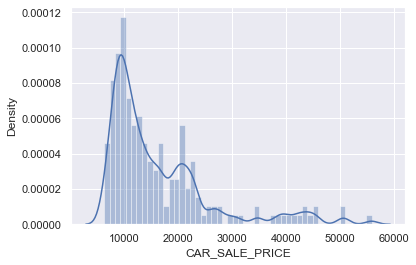

In [204]:
sns.distplot(data['CAR_SALE_PRICE'])

The observation of the target plot:
   - Deviate from normal distribution<br>
   - Positive skewness

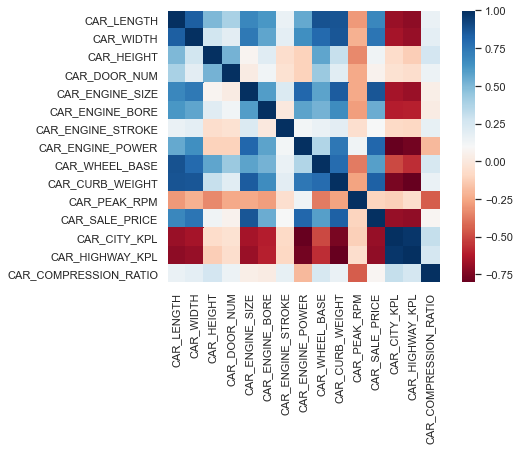

In [205]:
# Correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat, vmax=1, square=True, cmap='RdBu');

In my opinion, heatmap is the best way to get a quick overview of the feature's relationship,<br>
We can see that <br>
CAR_CITY_KPL, CAR_HIGHWAY_KPL, CAR_CURB_WEIGHT, CAR_ENGINE_POWER, CAR_ENGINE_SIZE, CAR_WIDTH, CAR_LENGTH have significant correlation with target CAR_SALE_PRICE.<br>
Other than that, I can see 
1. CAR_LENGTH CAR_WIDTH, CAR_CURB_WEIGHT, CAR_ENGINE_SIZE
1. CAR_CITY_KPL and CAR_HIGHWAY_KPL<br>

both cases showing very significant correlation as well. Assuming they will provide similar information which may lead to multicollinearity.

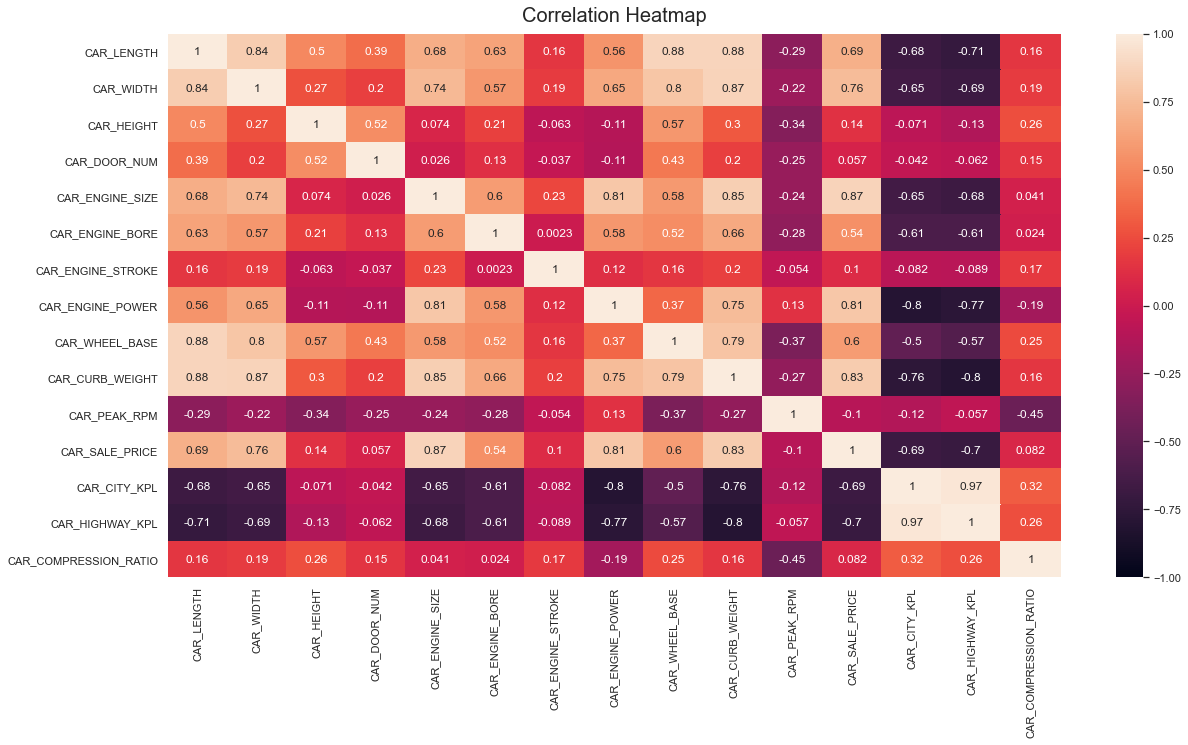

In [206]:
plt.figure(figsize=(20, 10))

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

- CAR_CITY_KPL, CAR_HIGHWAY_KPL, CAR_CURB_WEIGHT, CAR_ENGINE_POWER, CAR_ENGINE_SIZE, CAR_WIDTH, CAR_LENGTH are strongly correlated with CAR_SALE_PRICE 
- CAR_CITY_KPL and CAR_HIGHWAY_KPL are most of the most strongly correlated variables. From Machine Learning aspect, I will drop one of them to prevent multicollinearity. From this I will keep CAR_HIGHWAY_KPL as the correlation between this variable and CAR_SALE_PRICE is stronger.
- From the correlation martrix, observed that CAR_WIDTH, CAR_LENGTH, CAR_CURB_WEIGHT, CAR_WHEEL_BASE are strongly correlated, so I will keep only CAR_WIDTH which has the strongest correlation with CAR_SALE_PRICE
- Another interesting correlated variables, is CAR_ENGINE_POWER and CAR_ENGINE_SIZE, keep CAR_ENGINE_SIZE
- And CAR_ENGINE_BORE (?)

### Drop high correlated variables

In [208]:
data = data.drop(['CAR_CITY_KPL', 'CAR_LENGTH', 'CAR_CURB_WEIGHT', 'CAR_WHEEL_BASE', 'CAR_ENGINE_POWER'], axis=1)

### To visualize the correlation between variables and CAR_SALE_PRICE

C:\Users\yenhongc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


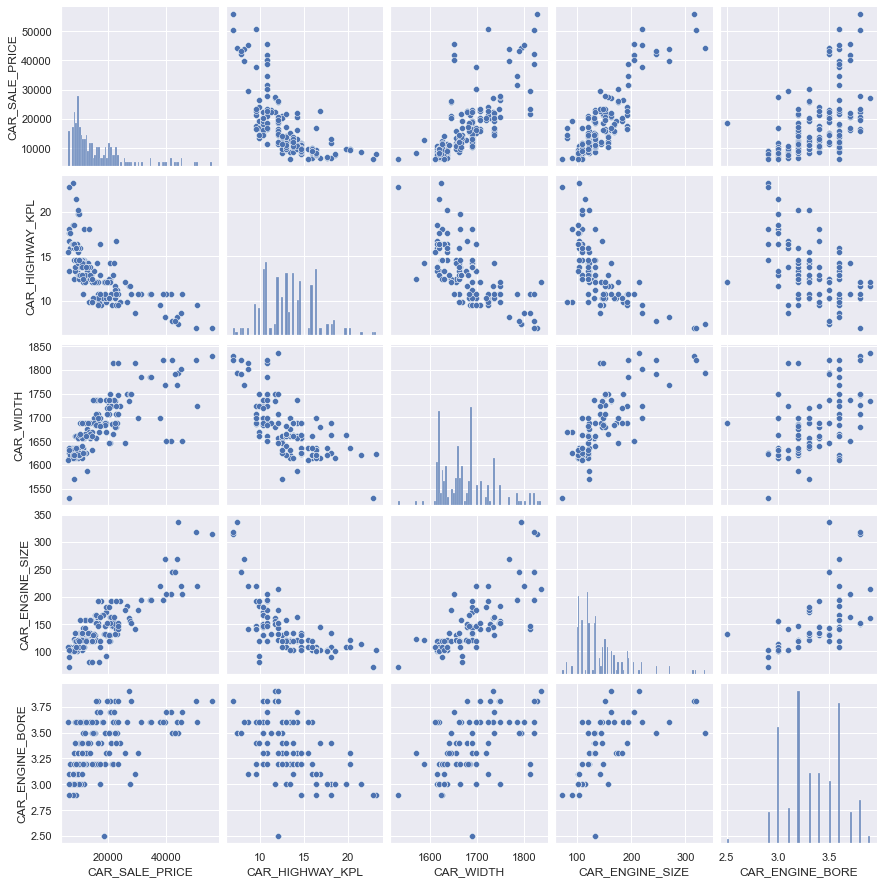

In [207]:
#scatterplot
sns.set()
cols = ['CAR_SALE_PRICE', 'CAR_HIGHWAY_KPL', 'CAR_WIDTH', 'CAR_ENGINE_SIZE', 'CAR_ENGINE_BORE']
sns.pairplot(data[cols], size = 2.5)
plt.show();

### Missing values

In [209]:
#Check missing values
data.isnull().sum().sort_values(ascending=False)

CAR_ENGINE_BORE          1380
CAR_ENGINE_STROKE        1380
CAR_SALE_PRICE            920
CAR_PEAK_RPM              460
CAR_BRAND                   0
CAR_WIDTH                   0
CAR_HEIGHT                  0
CAR_DOOR_NUM                0
CAR_BODY_STYLE              0
CAR_DRIVE_WHEELS            0
CAR_ENGINE_LOC              0
CAR_ENGINE_SIZE             0
CAR_HIGHWAY_KPL             0
CAR_FUEL_TYPE               0
CAR_FUEL_SYSTEM             0
CAR_COMPRESSION_RATIO       0
dtype: int64

In [210]:
# missing data
missing = pd.DataFrame(data.isnull().sum(), columns=['Total'])

To deal with the missing data, I will drop the missing rows from CAR_ENGINE_STROKE, CAR_ENGINE_BORE, CAR_ENGINE_POWER, CAR_PEAK_RPM. since none of these both variables seem to be very important (I will select CAR_ENGINE_SIZE as my input feature instead of the engine power), and the overall missing percentage among data is small.
<br>
To deal with CAR_SALE_PRICE(target), I have 2 options here, one is to drop them, one is to either use mean/median.

In [211]:
#column which contain missing value
(missing[missing['Total']>0]).index

Index(['CAR_ENGINE_BORE', 'CAR_ENGINE_STROKE', 'CAR_PEAK_RPM',
       'CAR_SALE_PRICE'],
      dtype='object')

In [212]:
data = data.drop([i for i in (missing[missing['Total']>0]).index if 'CAR_SALE_PRICE' not in i], axis=1)

In [213]:
# I will first try with drop all rows which CAR_SALE_PRICE is null
data = data.dropna(axis=0, subset=['CAR_SALE_PRICE'])

In [214]:
data = data.reset_index()

C:\Users\yenhongc\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


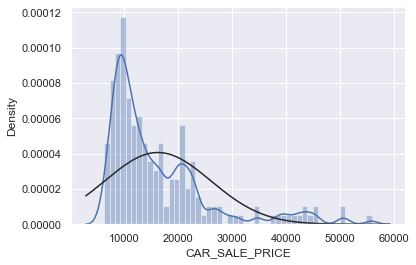

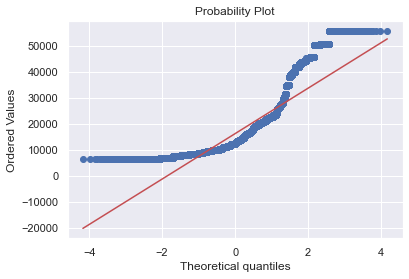

In [215]:
from scipy.stats import norm
from scipy import stats
# histogram and normal probability plot
sns.distplot(data['CAR_SALE_PRICE'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['CAR_SALE_PRICE'], plot=plt)

C:\Users\yenhongc\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


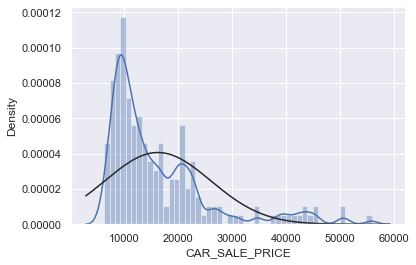

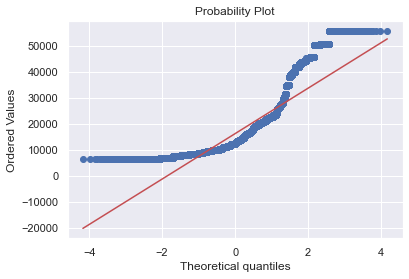

In [216]:
# transformed histogram and normal probability plot
sns.distplot(data['CAR_SALE_PRICE'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['CAR_SALE_PRICE'], plot=plt)

### Dealing with Categorical Variables

In [217]:
qualitative = data.select_dtypes('object')

In [218]:
qualitative.columns

Index(['CAR_BRAND', 'CAR_BODY_STYLE', 'CAR_DRIVE_WHEELS', 'CAR_ENGINE_LOC',
       'CAR_FUEL_TYPE', 'CAR_FUEL_SYSTEM'],
      dtype='object')

In [219]:
data['CAR_BRAND'].value_counts()

TOYOTA           7360
NISSAN           4140
MAZDA            3910
MITSUBISHI       2990
HONDA            2990
SUBARU           2760
VOLKSWAGEN       2760
PERODUA          2530
VOLVO            2530
FIAT             2070
MERCEDES-BENZ    1840
SUZUKI           1840
BMW              1840
PROTON           1610
AUDI             1380
RENAULT           920
JEEP              690
CITROEN           690
ISUZU             460
MCLAREN           230
Name: CAR_BRAND, dtype: int64

In [220]:
data['CAR_BODY_STYLE'].value_counts()

SEDAN          21620
HATCHBACK      15410
WAGON           5750
HARDTOP         1840
CONVERTIBLE      920
Name: CAR_BODY_STYLE, dtype: int64

In [221]:
data['CAR_DRIVE_WHEELS'].value_counts()

FWD    27140
RWD    16560
4WD     1840
Name: CAR_DRIVE_WHEELS, dtype: int64

In [222]:
data['CAR_ENGINE_LOC'].value_counts()

FRONT    44850
REAR       690
Name: CAR_ENGINE_LOC, dtype: int64

In [223]:
data['CAR_FUEL_TYPE'].value_counts()

GAS       40940
DIESEL     4600
Name: CAR_FUEL_TYPE, dtype: int64

In [224]:
data['CAR_FUEL_SYSTEM'].value_counts()

MPFI    20470
2BBL    14720
IDI      4600
1BBL     2530
SPDI     2070
4BBL      690
MFI       230
SPFI      230
Name: CAR_FUEL_SYSTEM, dtype: int64

In [225]:
data = pd.get_dummies(data, columns=['CAR_BRAND', 'CAR_BODY_STYLE', 'CAR_DRIVE_WHEELS', 'CAR_ENGINE_LOC',
       'CAR_FUEL_TYPE', 'CAR_FUEL_SYSTEM'])

In [226]:
data.head()

,index,CAR_WIDTH,CAR_HEIGHT,CAR_DOOR_NUM,CAR_ENGINE_SIZE,CAR_SALE_PRICE,CAR_HIGHWAY_KPL,CAR_COMPRESSION_RATIO,CAR_BRAND_AUDI,CAR_BRAND_BMW,CAR_BRAND_CITROEN,CAR_BRAND_FIAT,CAR_BRAND_HONDA,CAR_BRAND_ISUZU,CAR_BRAND_JEEP,CAR_BRAND_MAZDA,CAR_BRAND_MCLAREN,CAR_BRAND_MERCEDES-BENZ,CAR_BRAND_MITSUBISHI,CAR_BRAND_NISSAN,CAR_BRAND_PERODUA,CAR_BRAND_PROTON,CAR_BRAND_RENAULT,CAR_BRAND_SUBARU,CAR_BRAND_SUZUKI,CAR_BRAND_TOYOTA,CAR_BRAND_VOLKSWAGEN,CAR_BRAND_VOLVO,CAR_BODY_STYLE_CONVERTIBLE,CAR_BODY_STYLE_HARDTOP,CAR_BODY_STYLE_HATCHBACK,CAR_BODY_STYLE_SEDAN,CAR_BODY_STYLE_WAGON,CAR_DRIVE_WHEELS_4WD,CAR_DRIVE_WHEELS_FWD,CAR_DRIVE_WHEELS_RWD,CAR_ENGINE_LOC_FRONT,CAR_ENGINE_LOC_REAR,CAR_FUEL_TYPE_DIESEL,CAR_FUEL_TYPE_GAS,CAR_FUEL_SYSTEM_1BBL,CAR_FUEL_SYSTEM_2BBL,CAR_FUEL_SYSTEM_4BBL,CAR_FUEL_SYSTEM_IDI,CAR_FUEL_SYSTEM_MFI,CAR_FUEL_SYSTEM_MPFI,CAR_FUEL_SYSTEM_SPDI,CAR_FUEL_SYSTEM_SPFI
0,0,1569.72,1358.90,4,122,8345.55,12.47,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0
1,1,1635.76,1341.12,4,109,10280.34,14.62,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0
2,2,1656.08,1374.14,4,121,15922.35,12.04,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
3,3,1587.50,1374.14,4,121,12662.85,14.19,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0
4,4,1663.70,1414.78,4,108,11678.85,18.06,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0


### Fitting model

In [227]:
X = data.drop(['CAR_SALE_PRICE'], axis=1)
y = data['CAR_SALE_PRICE']

In [228]:
for i in X.columns:
    counts = X[i].value_counts()
    print (counts)

0        1
29307    1
19100    1
17053    1
23198    1
        ..
32069    1
25926    1
27975    1
5448     1
2047     1
Name: index, Length: 45540, dtype: int64
1689.10    5520
1620.52    5520
1661.16    3450
1635.76    2300
1737.36    2300
1615.44    2070
1625.60    2070
1663.70    1610
1656.08    1610
1684.02    1380
1630.68    1380
1666.24    1380
1706.88    1380
1699.26    1150
1724.66     920
1668.78     920
1645.92     920
1750.06     920
1785.62     690
1623.06     690
1651.00     690
1813.56     690
1821.18     690
1734.82     460
1719.58     460
1767.84     460
1640.84     460
1678.94     460
1793.24     230
1800.86     230
1686.56     230
1681.48     230
1531.62     230
1676.40     230
1727.20     230
1828.80     230
1790.70     230
1569.72     230
1587.50     230
1610.36     230
1747.52     230
Name: CAR_WIDTH, dtype: int64
1290.32    3220
1414.78    2760
1384.30    2300
1374.14    2300
1424.94    2070
1320.80    2070
1409.70    2070
1379.22    1840
1440.18    1840
1310.64 

In [229]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [230]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [231]:
X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((36432, 47), (36432,), (9108, 47), (9108,))

### Linear Regression

In [251]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print(type(model).__name__)
print("    MAE", mean_absolute_error(y_test, y_test_pred))
print("    RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("    R2", r2_score(y_test, y_test_pred))

LinearRegression
    MAE 1618.410099021661
    RMSE 2307.4843098712436
    R2 0.9455707258525512


In [253]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
cv = KFold(shuffle=True, random_state=2, n_splits=10)
scores = cross_val_score(model, X_train_scaled, y_train,cv = cv, scoring = 'neg_mean_absolute_error')

In [254]:
print ('%.8f'%scores.mean())

-1627.78156060


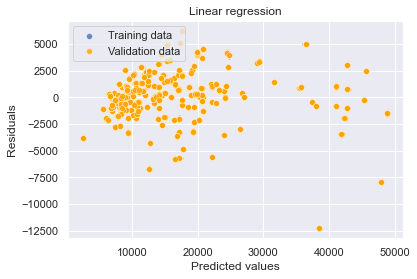

In [260]:
#plot between predicted values and residuals
sns.scatterplot(x=y_train_pred, y=y_train_pred - y_train, alpha=0.8,  label = "Training data");
sns.scatterplot(x=y_test_pred, y=y_test_pred - y_test, alpha=0.8, color = "orange",  label = "Validation data");
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()

### GradientBoostingRegressor

In [265]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)

In [266]:
print('GradientBoosting')
gbr_model = gbr.fit(X_train_scaled, y_train)

GradientBoosting


In [267]:
y_test_pred = gbr_model.predict(X_test_scaled)
y_train_pred = gbr_model.predict(X_train_scaled)

print(type(gbr_model).__name__)
print("    MAE", mean_absolute_error(y_test, y_test_pred))
print("    RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("    R2", r2_score(y_test, y_test_pred))

GradientBoostingRegressor
    MAE 382.3563746574839
    RMSE 837.3735727822334
    R2 0.9928320737113049


In [268]:
scores = cross_val_score(gbr_model, X_train_scaled, y_train,cv = cv, scoring = 'neg_mean_absolute_error')

In [270]:
print ('%.8f'%scores.mean())

-390.19797523


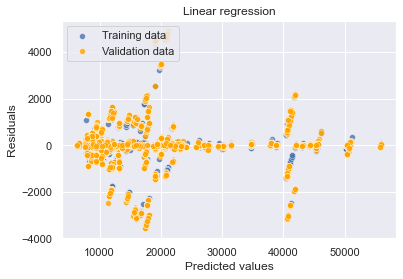

In [269]:
#plot between predicted values and residuals
sns.scatterplot(x=y_train_pred, y=y_train_pred - y_train, alpha=0.8,  label = "Training data");
sns.scatterplot(x=y_test_pred, y=y_test_pred - y_test, alpha=0.8, color = "orange",  label = "Validation data");
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()

I use 2 models which is Linear Regression and Gradient Boosting for the CAR_SALE_PRICE prediction, I can see Gradient Boosting model performs better as it has lower Mean Absolutute Error and Higher R-squared value. This results is only comparing both of the models, it probably can be better if done with some regularization. 